In [2]:
import pm4py
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pickle
import numpy as np
import tqdm
import seaborn as sns
from project_functions import *
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator


In [3]:
log_df = None
with open("data/log_df_filtered.pkl", "rb") as f:
    log_df = pickle.load(f)

print("We have",len(log_df['case:concept:name'].unique()),"cases")

We have 130883 cases


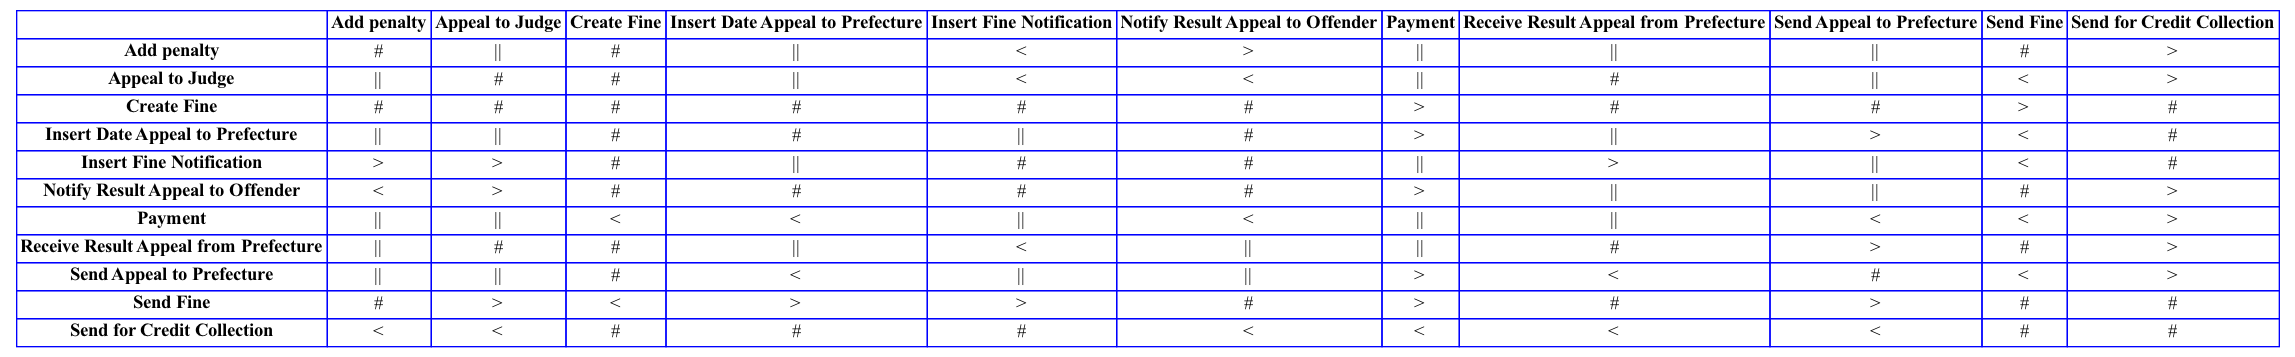

In [24]:
footprints = pm4py.discover_footprints(log_df)
pm4py.view_footprints(footprints, format='png')

# Direct follow graph

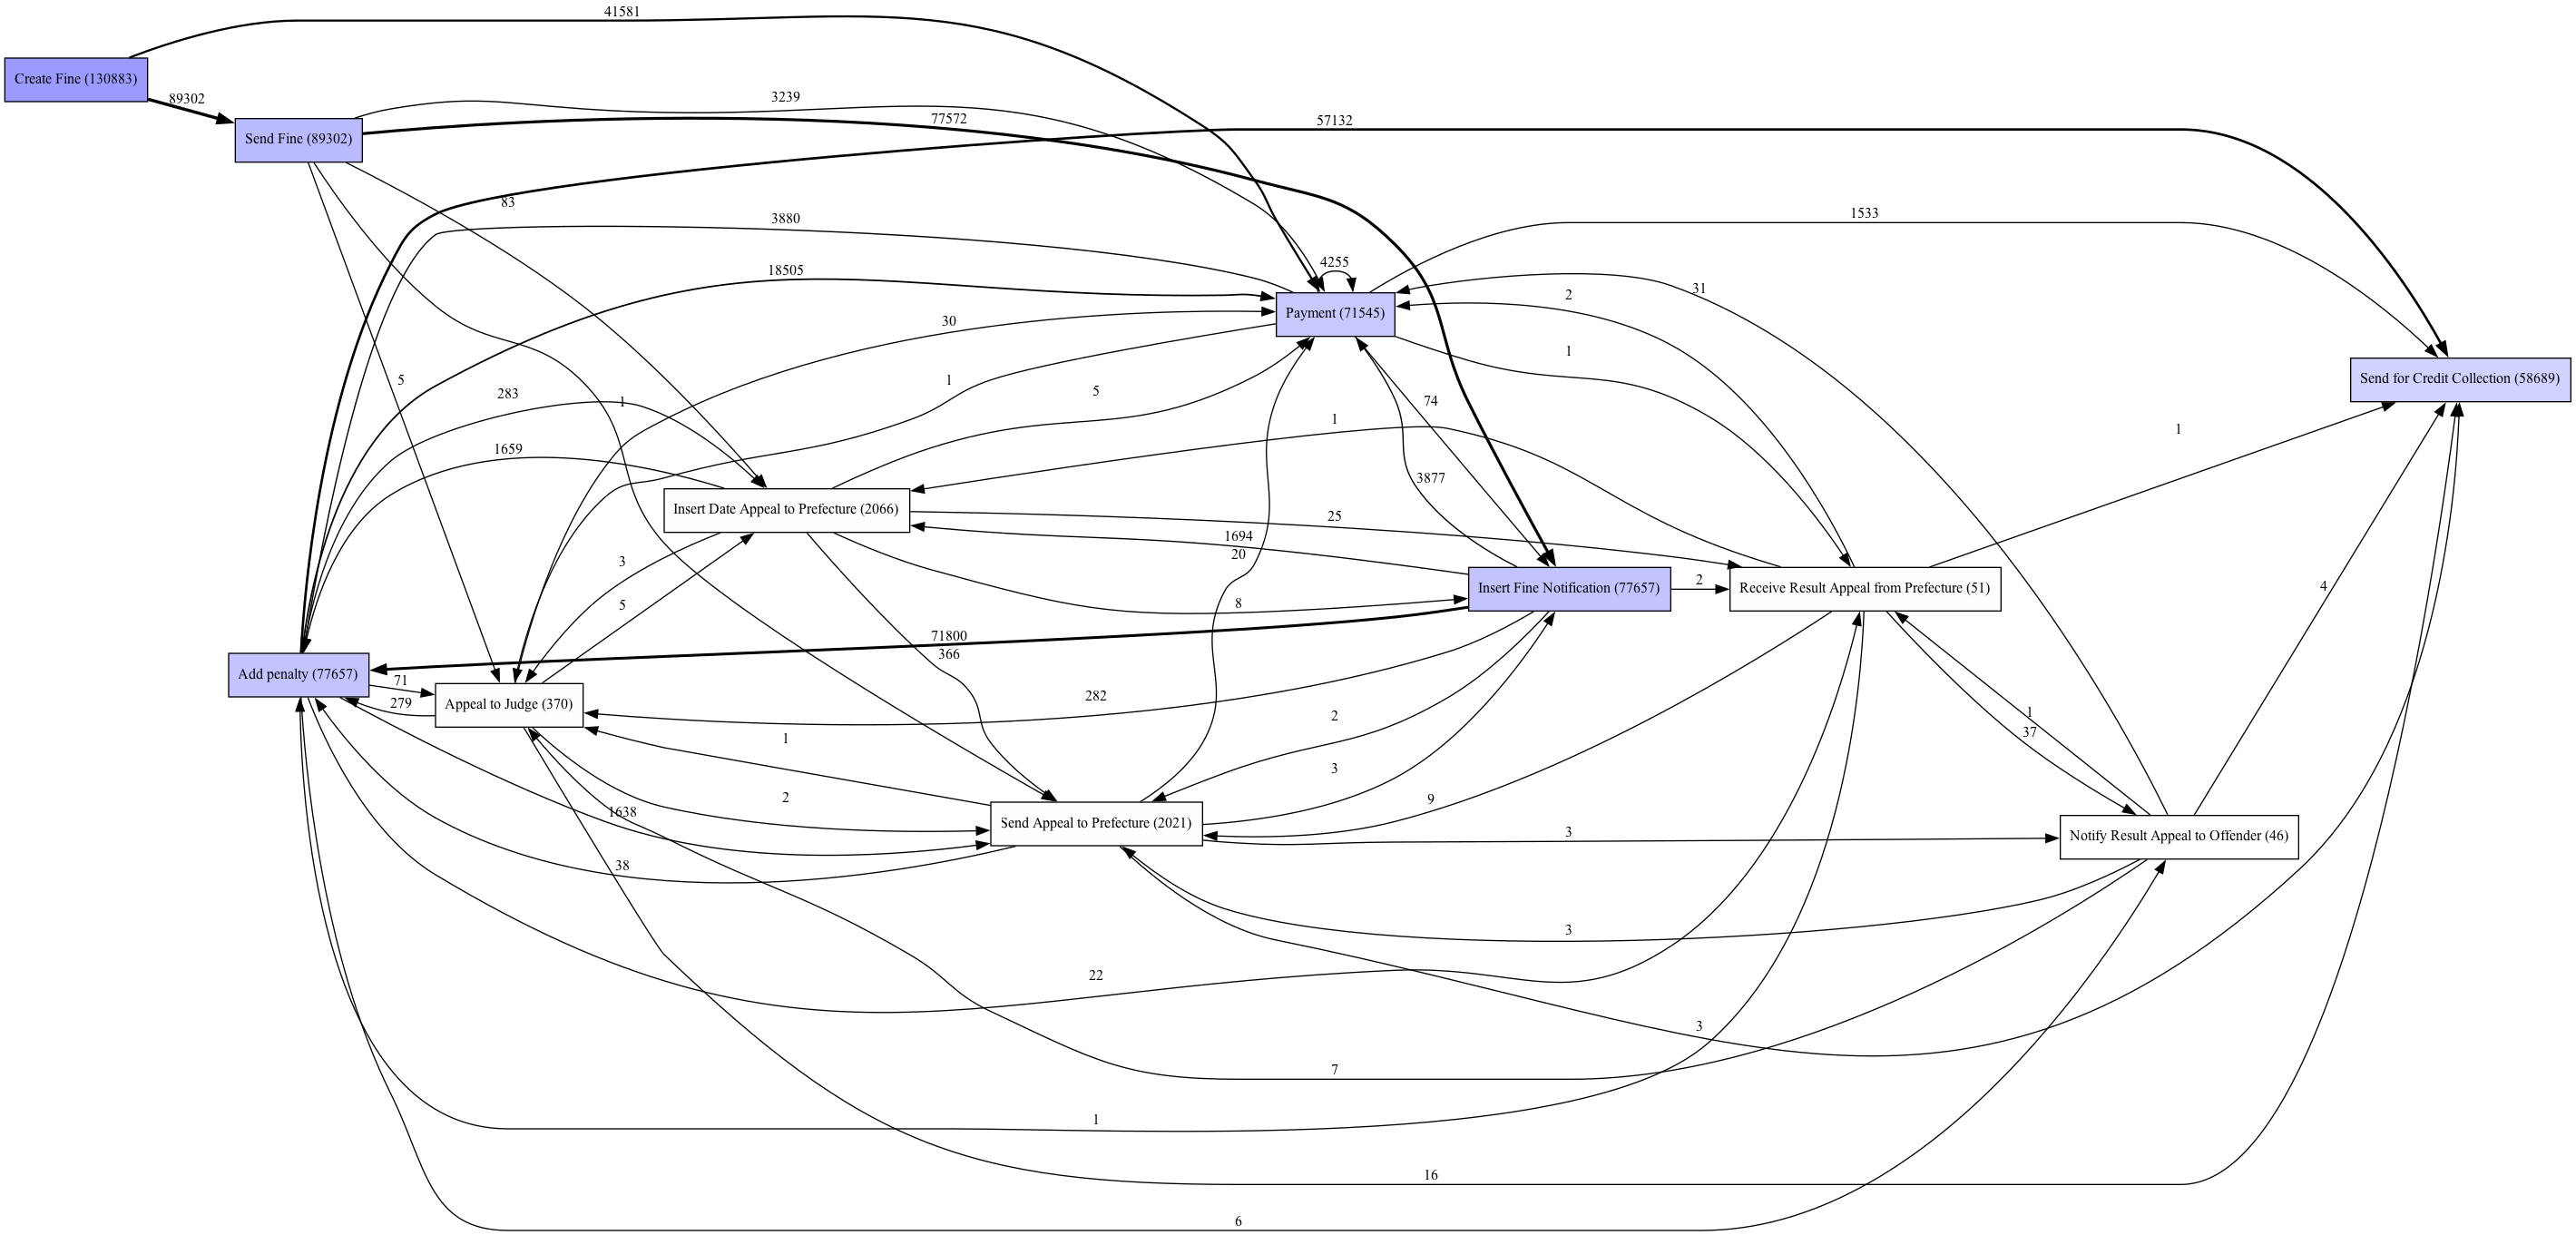

In [5]:

dfg = dfg_discovery.apply(log_df)

gviz = dfg_visualization.apply(dfg, log=log_df, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)

The goal of the next steps are to identify the best miner algorithm for this scenario. To decide whether a miner is good we look at the metrics produced with replay technique:
* fitness
* simplicity
* precision
* generalisation

In the best case we take the model with the higher values for each metric. Most likely this won't happen, and so we will focus on the one with an overall high score, and a high level of precision, and preferably high simplicity. This is because we want to identify any bottleneck or inefficient situation and we want a model that doesn't allow any behavior that was not seen in the log.


# Alpha miner

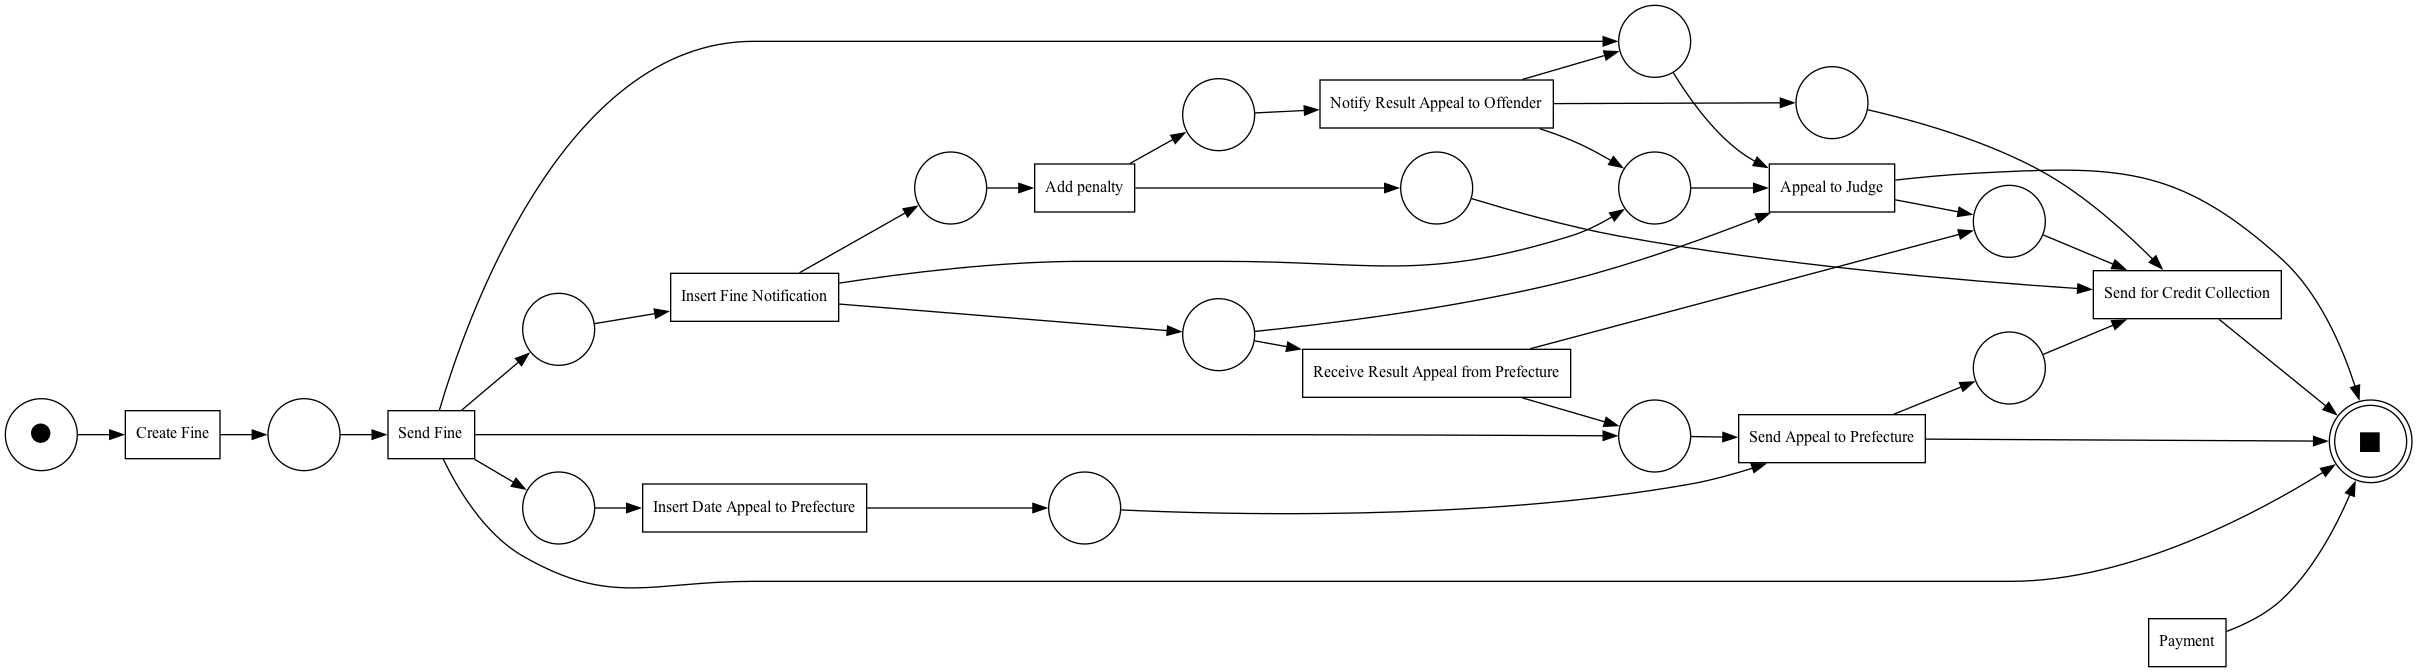

In [6]:
net_alpha, im_alpha, fm_alpha = pm4py.discover_petri_net_alpha(log_df)

pm4py.view_petri_net(net_alpha, im_alpha, fm_alpha, format='png')

In [7]:
precision_tbr= pm4py.precision_token_based_replay(log_df,net_alpha,im_alpha,fm_alpha)
print("Precision: ",precision_tbr)
fitness_tbr= pm4py.fitness_token_based_replay(log_df,net_alpha,im_alpha,fm_alpha)
print("Recall: ",fitness_tbr)

simp = simplicity_evaluator.apply(net_alpha)
print("Simplicity: ",simp)

gen = generalization_evaluator.apply(log_df, net_alpha, im_alpha, fm_alpha)
print("Generalization: ",gen)



/Users/alessandro/miniforge3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
replaying log with TBR, completed traces :: 100%|██████████| 158/158 [00:00<00:00, 4039.38it/s]


Precision:  0.7642643806551442


replaying log with TBR, completed traces :: 100%|██████████| 108/108 [00:00<00:00, 248.61it/s]


Recall:  {'perc_fit_traces': 0.0, 'average_trace_fitness': 0.6813356404110867, 'log_fitness': 0.614467138848865, 'percentage_of_fitting_traces': 0.0}
Simplicity:  0.5294117647058824


replaying log with TBR, completed traces :: 100%|██████████| 108/108 [00:00<00:00, 149.19it/s]


Generalization:  0.9631948946819937


As expected, this algorithm produced overall low scores, and so we move on to the next.

# ILP miner

discovering Petri net using ILP miner, completed causal relations :: 100%|██████████| 29/29 [00:00<00:00, 401.94it/s]


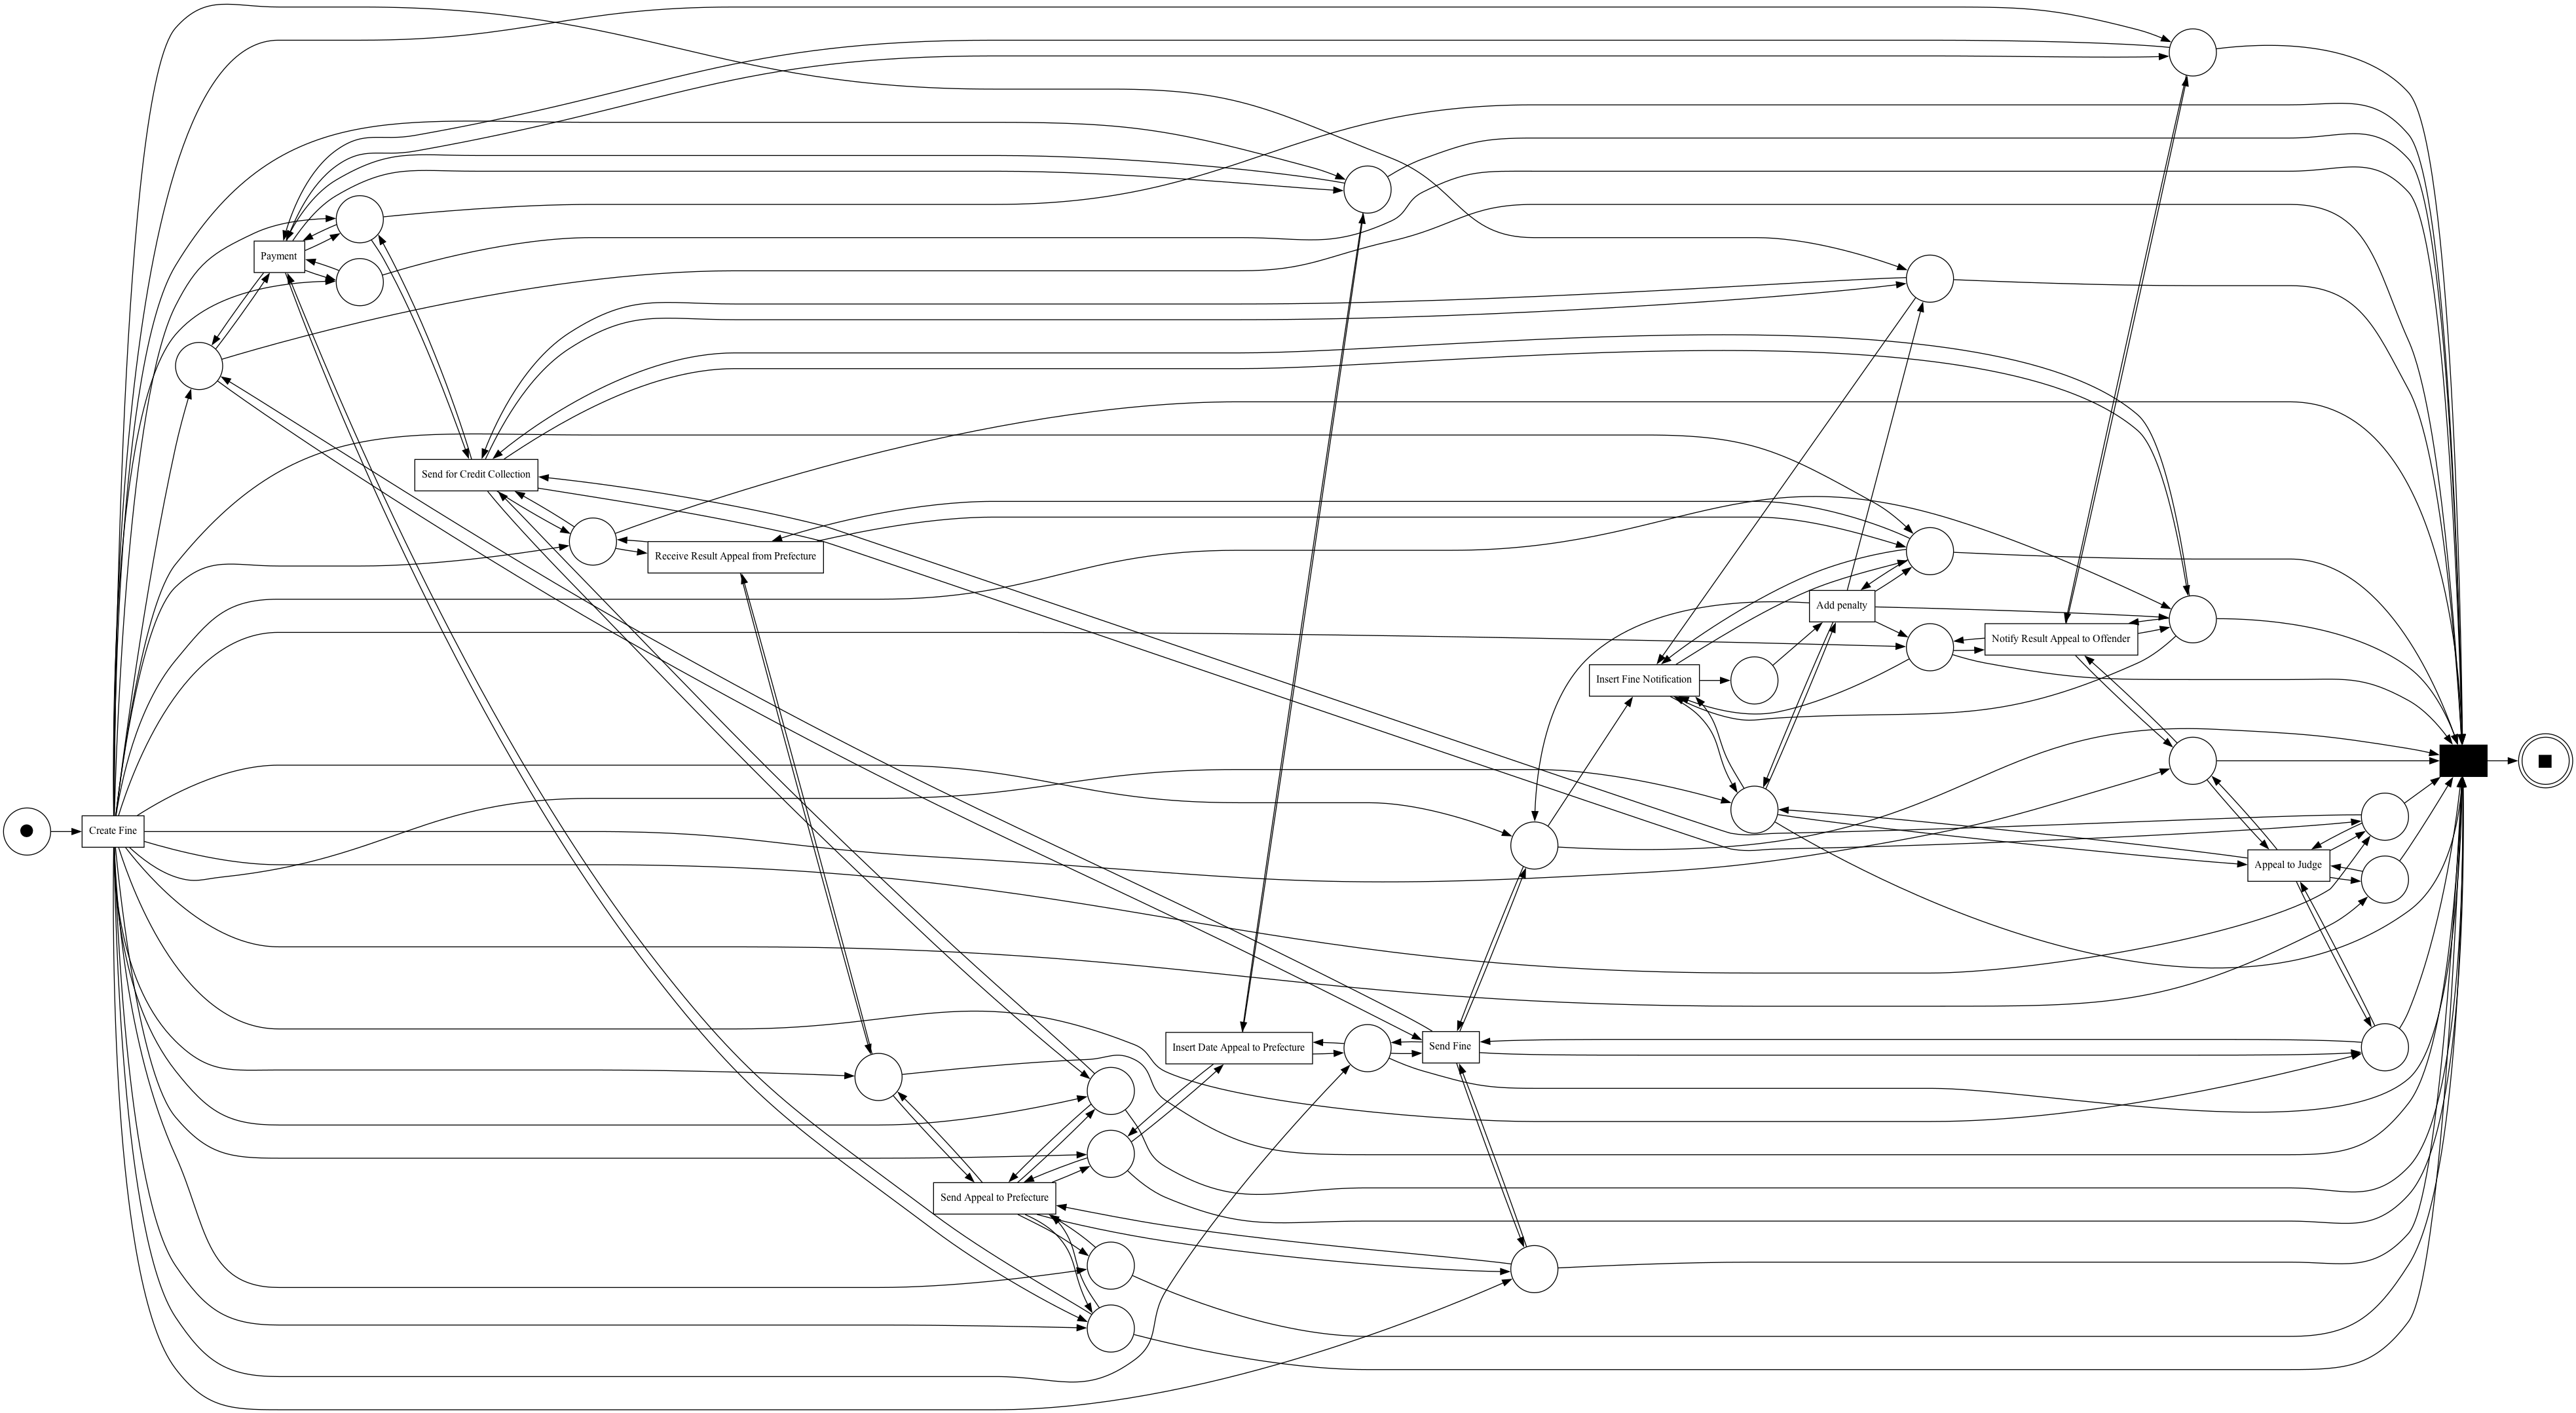

In [16]:
net_ilp, im_ilp, fm_ilp = pm4py.discover_petri_net_ilp(log_df, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_petri_net(net_ilp, im_ilp, fm_ilp, format='png')

In [27]:
precision_tbr= pm4py.precision_token_based_replay(log_df,net_ilp,im_ilp,fm_ilp)
print("Precision: ",precision_tbr)
fitness_tbr= pm4py.fitness_token_based_replay(log_df,net_ilp,im_ilp,fm_ilp)
print("Recall: ",fitness_tbr)

simp = simplicity_evaluator.apply(net_ilp)
print("Simplicity: ",simp)

gen = generalization_evaluator.apply(log_df, net_ilp, im_ilp, fm_ilp)
print("Generalization: ",gen)

replaying log with TBR, completed traces :: 100%|██████████| 158/158 [00:00<00:00, 1169.44it/s]


Precision:  0.5573248320963973


replaying log with TBR, completed traces :: 100%|██████████| 108/108 [00:01<00:00, 98.63it/s]


Recall:  {'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0, 'percentage_of_fitting_traces': 100.0}
Simplicity:  0.15447154471544716


replaying log with TBR, completed traces :: 100%|██████████| 108/108 [00:01<00:00, 97.20it/s]


Generalization:  0.9660316426702553


We do not further anylize this model because of the low precision and even lower simplicity.

# Inductive miner algorithm

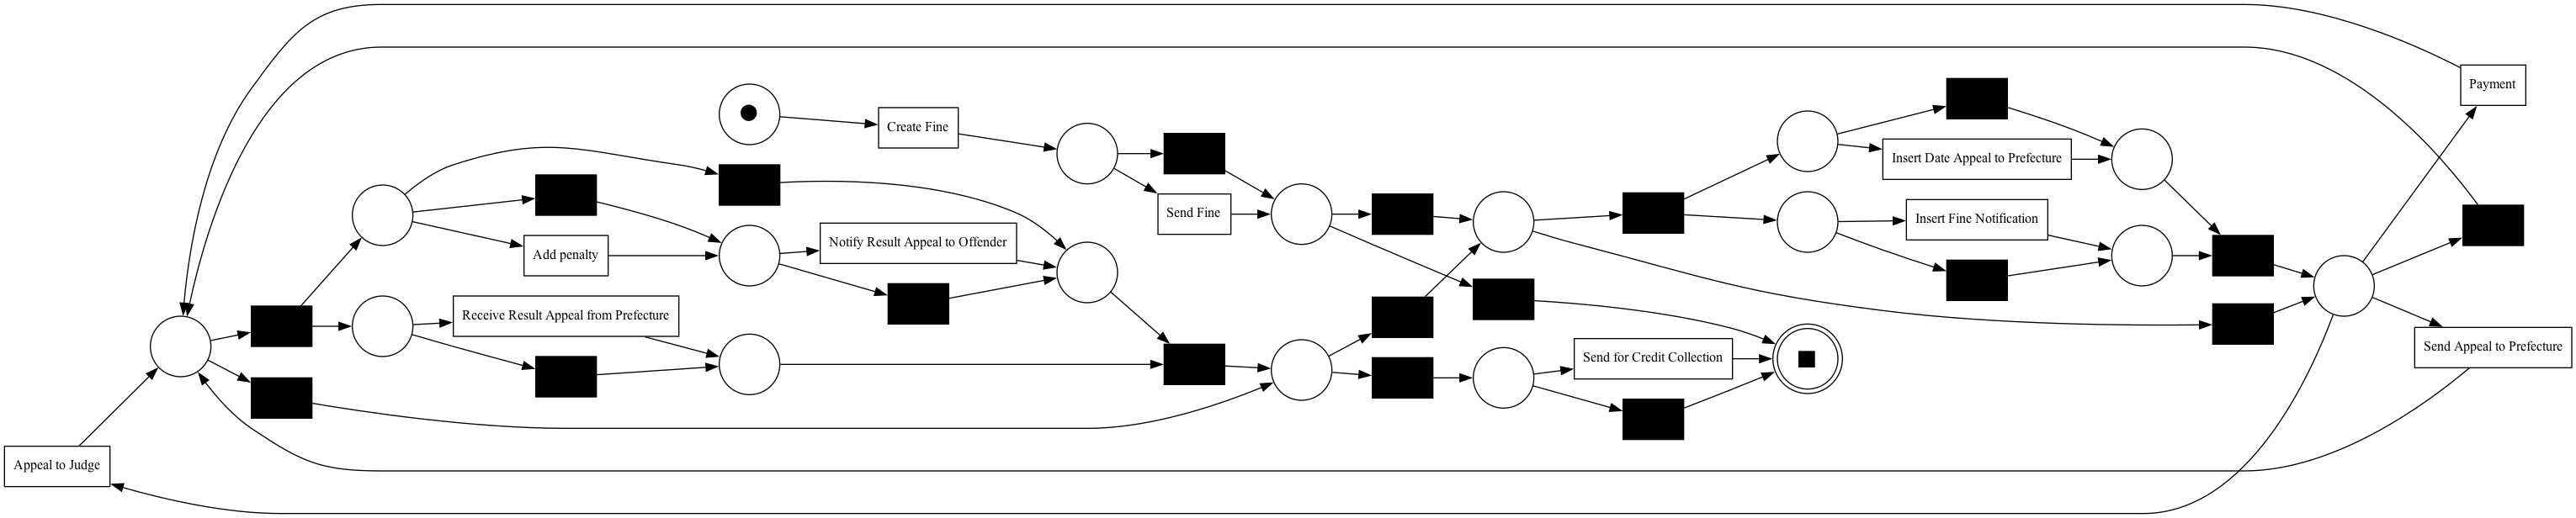

In [8]:
net_ind, im_ind, fm_ind = pm4py.discover_petri_net_inductive(log_df, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_petri_net(net_ind, im_ind, fm_ind, format='png')

In [9]:
precision_tbr= pm4py.precision_token_based_replay(log_df,net_ind,im_ind,fm_ind)
print("Precision: ",precision_tbr)
fitness_tbr= pm4py.fitness_token_based_replay(log_df,net_ind,im_ind,fm_ind)
print("Recall: ",fitness_tbr)

simp = simplicity_evaluator.apply(net_ind)
print("Simplicity: ",simp)

gen = generalization_evaluator.apply(log_df, net_ind, im_ind, fm_ind)
print("Generalization: ",gen)

replaying log with TBR, completed traces :: 100%|██████████| 158/158 [00:00<00:00, 1067.54it/s]


Precision:  0.504877452225279


replaying log with TBR, completed traces :: 100%|██████████| 108/108 [00:00<00:00, 155.60it/s]


Recall:  {'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0, 'percentage_of_fitting_traces': 100.0}
Simplicity:  0.6000000000000001


replaying log with TBR, completed traces :: 100%|██████████| 108/108 [00:00<00:00, 139.30it/s]


Generalization:  0.9640981617674659


This model has perfect fitness and this leads to having low precision, and so we discard it.

# Heuristic miner

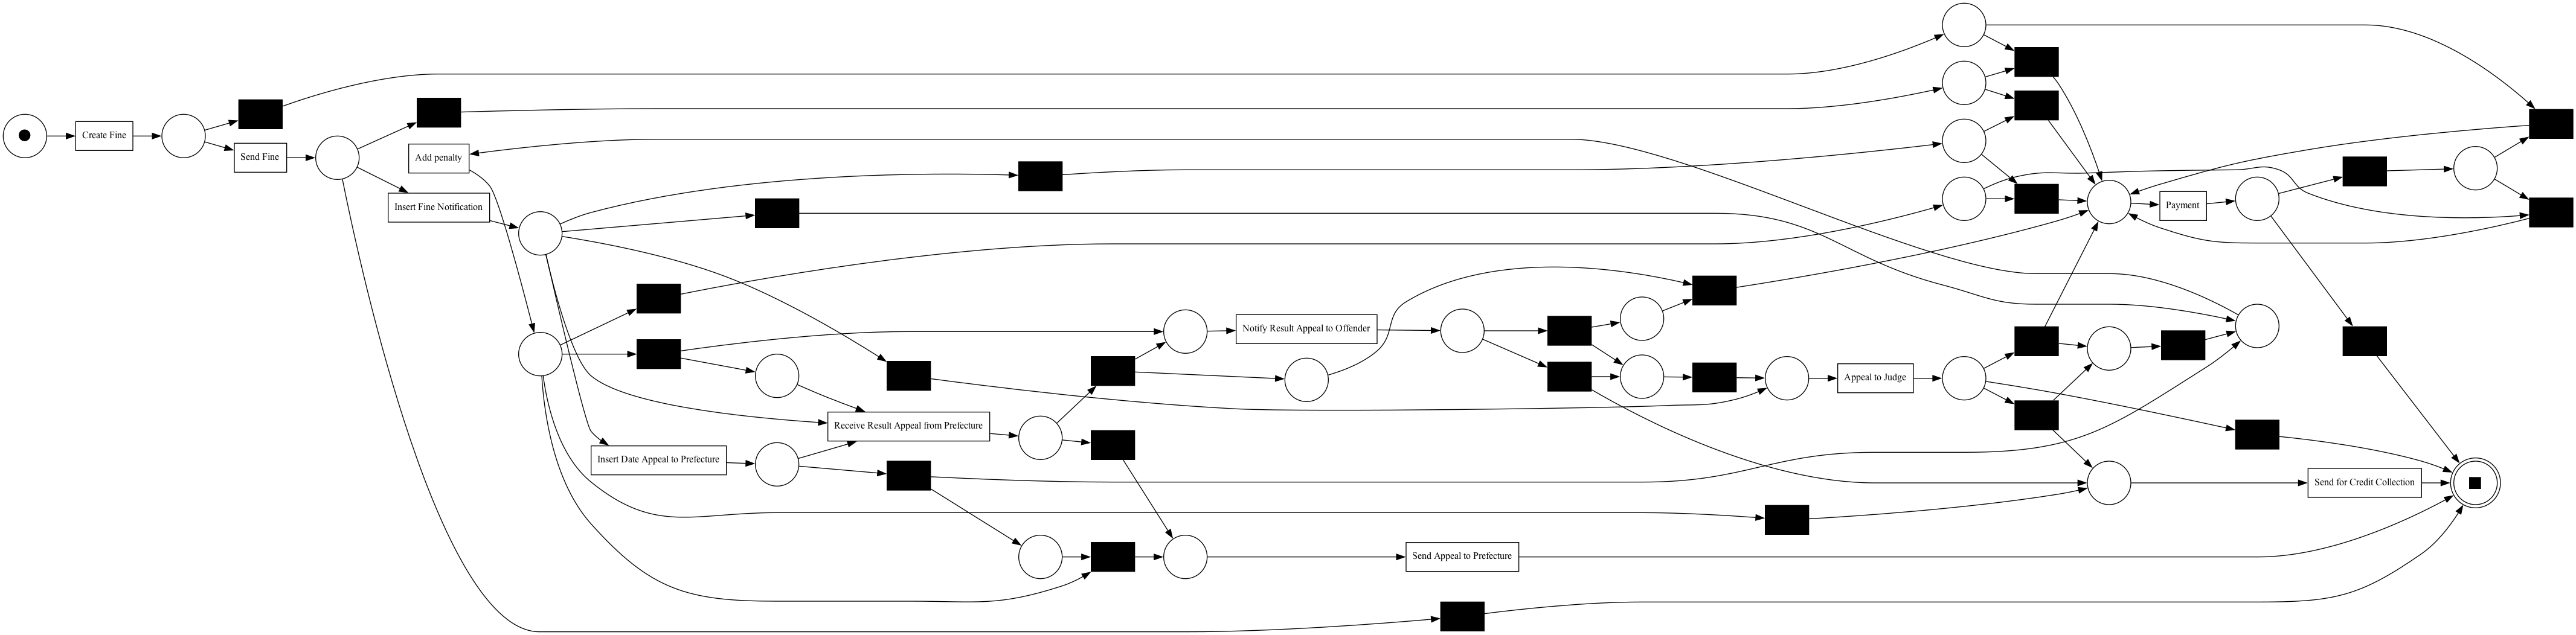

In [32]:
net_heu, im_heu, fm_heu = pm4py.discover_petri_net_heuristics(log_df,
                                                              activity_key='concept:name', 
                                                              case_id_key='case:concept:name', 
                                                              timestamp_key='time:timestamp',
                                                              )
pm4py.view_petri_net(net_heu, im_heu, fm_heu, format='png')

In [33]:
precision_tbr= pm4py.precision_token_based_replay(log_df,net_heu,im_heu,fm_heu)
print("Precision: ",precision_tbr)
fitness_tbr= pm4py.fitness_token_based_replay(log_df,net_heu,im_heu,fm_heu)
print("Recall: ",fitness_tbr)

simp = simplicity_evaluator.apply(net_heu)
print("Simplicity: ",simp)

gen = generalization_evaluator.apply(log_df, net_heu, im_heu, fm_heu)
print("Generalization: ",gen)

replaying log with TBR, completed traces :: 100%|██████████| 158/158 [00:00<00:00, 3697.81it/s]


Precision:  0.9962209488834087


replaying log with TBR, completed traces :: 100%|██████████| 108/108 [00:00<00:00, 155.66it/s]


Recall:  {'perc_fit_traces': 50.829366686277055, 'average_trace_fitness': 0.9158209727955985, 'log_fitness': 0.928539976417641, 'percentage_of_fitting_traces': 50.829366686277055}
Simplicity:  0.5537190082644627


replaying log with TBR, completed traces :: 100%|██████████| 108/108 [00:00<00:00, 130.91it/s]


Generalization:  0.8489479865658871


This is algorithm produced the model with the scores we want. So we will use this to conduct some analysis.

## Alignment technique

We now use alignment technique for conformance checking in order to identify deviations.


Apply the alignments algorithm between a log and a process model.
The methods return the full alignment diagnostics.

Alignment-based replay aims to find one of the best alignment between the trace and the model. For each trace, the output of an alignment is a list of couples where the first element is an event (of the trace) or » and the second element is a transition (of the model) or ». For each couple, the following classification could be provided:

* Sync move: the classification of the event corresponds to the transition label; in this case, both the trace and the model advance in the same way during the replay.
* Move on log: for couples where the second element is », it corresponds to a replay move in the trace that is not mimicked in the model. This kind of move is unfit and signal a deviation between the trace and the model.
* Move on model: for couples where the first element is », it corresponds to a replay move in the model that is not mimicked in the trace. For moves on model, we can have the following distinction:
    - Moves on model involving hidden transitions: in this case, even if it is not a sync move, the move is fit.
    - Moves on model not involving hidden transitions: in this case, the move is unfit and signals a deviation between the trace and the model.

In [36]:

aligned_traces= pm4py.conformance_diagnostics_alignments(log_df, net_heu, im_heu, fm_heu)


aligning log, completed variants :: 100%|██████████| 108/108 [00:00<00:00, 260.59it/s]


In [41]:
aligned_traces[1]['alignment']

[('Create Fine', 'Create Fine'),
 ('Send Fine', 'Send Fine'),
 ('Insert Fine Notification', 'Insert Fine Notification'),
 ('>>', None),
 ('Add penalty', 'Add penalty'),
 ('Payment', '>>'),
 ('>>', None),
 ('>>', 'Send for Credit Collection')]

Total deviations: 116578
Log moves (events in log not in model): 58828
Model moves (events in model not in log): 57750


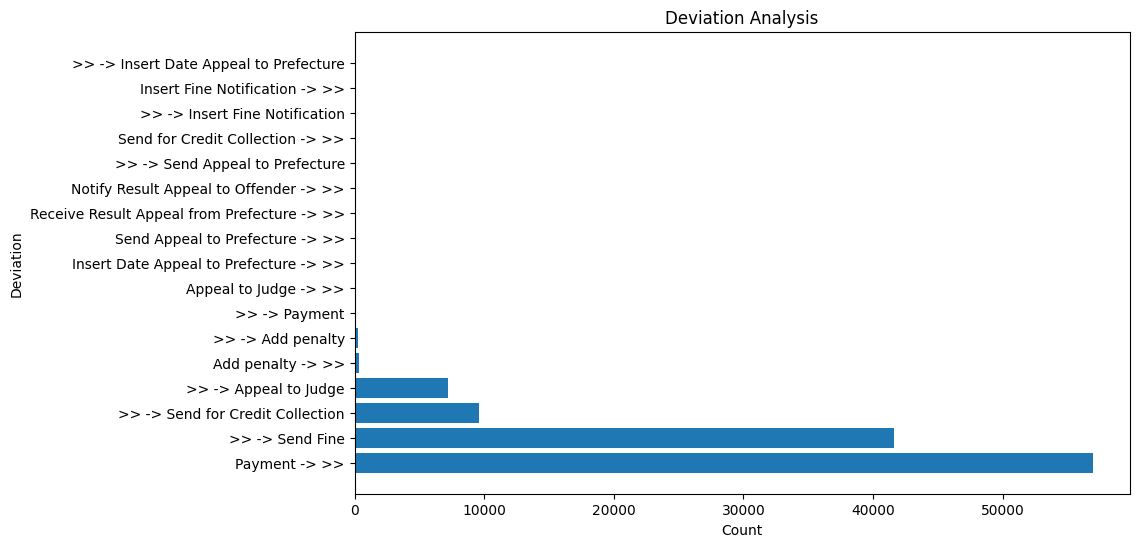

In [42]:
deviations = []

#extract deviations 
for trace in aligned_traces:
    for step in trace['alignment']:
        if step[0] != step[1] and step[0] != None and step[1] != None:
            deviations.append(step)

# Statistiche delle deviazioni
num_deviations = len(deviations)
num_log_moves = sum(1 for step in deviations if step[0] == '>>')
num_model_moves = sum(1 for step in deviations if step[1] == '>>')

print(f'Total deviations: {num_deviations}')
print(f'Log moves (events in log not in model): {num_log_moves}')
print(f'Model moves (events in model not in log): {num_model_moves}')

# Visualizzazione delle deviazioni
import matplotlib.pyplot as plt
import pandas as pd

# Creare un DataFrame per le deviazioni
deviations_df = pd.DataFrame(deviations, columns=['Model Move', 'Log Move'])

# Contare le occorrenze delle deviazioni
deviation_counts = deviations_df.value_counts().reset_index(name='Count')

# Visualizzare le deviazioni
plt.figure(figsize=(10, 6))
plt.barh(deviation_counts['Model Move'] + ' -> ' + deviation_counts['Log Move'], deviation_counts['Count'])
plt.xlabel('Count')
plt.ylabel('Deviation')
plt.title('Deviation Analysis')
plt.show()

By looking at the chart we can infer some knowledge and explain four most common deviations:
#### ♦︎ Payment -> >>
<strong> type</strong>: Log move

This is the easiest to explain because the model permit another action after the payment, while in reality this occurs rarely. There are some case where the fine was not fully paid and so the person continued to pay until he reached the total amount to be paid.

#### ♦︎ >> -> Send Fine
<strong> type</strong>: Model move

This deviations is a problematic already appeared in the preliminary analysis. We know that the police has a problem with the notification sending, causing the creation of a lot of variants. When it comes to Send Fine we know that the only accettable previous activity is Create Fine, but instead we have a lot of different activities that the model cannot capture.

#### ♦︎ >> -> Send For Credit Collection and >> -> Appeal to judge
<strong> type</strong>: Model move

This two deviations, being related to two accettable end activities, can be reached from multiple different activities, thus creating a lot of deviations. 

# Conclusion

Having compute conformance checking with both replay and alignment technique on heuristic miner, we can now discuss the process of fine management.

As appeared multiple times, the notification sending cause a lot of problems. While computing the filtering and variant analysis we observe that a lot of cases were dismissed becauese the notification was sent beyond the 90 days stipulated in the Highway Code. We also have a lot of cases ended with send fine that follow the 90 constraint; in some of them we can explain this because the data were stopped being collected right after the notification was sent, but this does not apply every time. Another problem with the notification is that it is sent even after the person has paid, causing them to have to pay expense in order to close the file.

The other big issue that appear from the model is the juridical procedure. There are a lot of possible different path, and it's unknown if there are problems with the information system collecting the log or if it is a normal behavior: we see that sometimes the person is notified of the result of the appeal, and sometimes this does not happen. Also we have to consider that involving the juridical part in this process increase by a lot the time of case.


To fix this issues the police should:
* improve his sending notification service 
* Improve the data collection with the IS. Altough we have a massive dataset, a lot cases were discarded for being noisy (and possibly a lot of case use in this analysis should have been removed, but it was impossible to identify them as noise); and also there were too few feautures collected in the various activities. This not only reduce the quality of the analysis we can provide (becaus we cannot identify noise), but remove the possibility to compute more fine analysis on particular topics.